# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Dropout, BatchNormalization, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [0]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

In [0]:
np.shape(trainY), np.shape(trainX)

((50000, 1), (50000, 32, 32, 3))

In [0]:
trainX = trainX/255
testX = testX/255

In [0]:
p = trainY>=5
p=p.reshape(50000,)
p.shape

(50000,)

In [0]:
p

array([ True,  True,  True, ...,  True, False, False])

In [0]:
trainX59 = trainX[p,:,:,:]
trainX59.shape

(25000, 32, 32, 3)

In [0]:
trainY59 = trainY[p,:]
trainY59.shape

(25000, 1)

In [0]:
p = testY>=5
p=p.reshape(10000,)
p.shape 

(10000,)

In [0]:
testX59 = testX[p,:,:,:]
testX59.shape

(5000, 32, 32, 3)

In [0]:
testY59 = testY[p,:]
testY59.shape

(5000, 1)

In [0]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
p = trainY<5
p = p.reshape(50000,)
p

array([False, False, False, ..., False,  True,  True])

In [0]:
trainX04 = trainX[p,:,:,:]
trainX04.shape

(25000, 32, 32, 3)

In [0]:
trainY04 = trainY[p,:]
trainY04.shape

(25000, 1)

In [0]:
p = testY<5
p = p.reshape(10000,)
p 

array([ True, False, False, ..., False,  True, False])

In [0]:
testX04 = testX[p,:,:,:]
testX04.shape

(5000, 32, 32, 3)

In [0]:
testY04 = testY[p,:]
testY04.shape

(5000, 1)

In [0]:
trainX59.shape, trainY59.shape, testX59.shape, testY59.shape

((25000, 32, 32, 3), (25000, 1), (5000, 32, 32, 3), (5000, 1))

In [0]:
trainX04.shape, trainY04.shape, testX04.shape, testY04.shape

((25000, 32, 32, 3), (25000, 1), (5000, 32, 32, 3), (5000, 1))

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
trainY04_encoded = tf.keras.utils.to_categorical(trainY04, num_classes=5)
testY04_encoded = tf.keras.utils.to_categorical(testY04, num_classes=5)

In [0]:
#As we are getting our out of bound error, hence subtracting 5 from trainY59/testY59
trainY59_encoded = tf.keras.utils.to_categorical((trainY59-5), num_classes=5)
testY59_encoded = tf.keras.utils.to_categorical((testY59-5), num_classes=5)

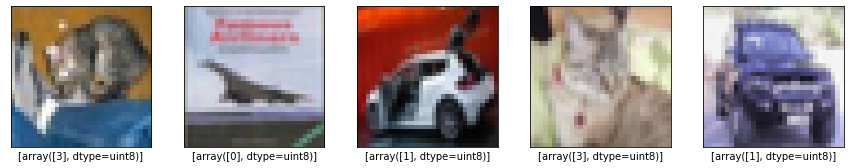

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX04[i])
    plt.xlabel([testY04[i]])
plt.show()

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
clear_session()
model = Sequential()
model.add(BatchNormalization(input_shape= (32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

In [0]:
model.compile(optimizer='adam',metrics = ['accuracy'],loss = 'categorical_crossentropy' )

In [0]:
testX04.dtype

dtype('float64')

In [0]:
model.fit(trainX04,trainY04_encoded,validation_data=(testX04,testY04_encoded),epochs =10, batch_size= 32)


Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 7s 280us/sample - loss: 0.9047 - accuracy: 0.6345 - val_loss: 0.7316 - val_accuracy: 0.7120
Epoch 2/10
25000/25000 [==============================] - 6s 250us/sample - loss: 0.6469 - accuracy: 0.7500 - val_loss: 0.6101 - val_accuracy: 0.7630
Epoch 3/10
25000/25000 [==============================] - 6s 253us/sample - loss: 0.5528 - accuracy: 0.7920 - val_loss: 0.5453 - val_accuracy: 0.7936
Epoch 4/10
25000/25000 [==============================] - 6s 251us/sample - loss: 0.4822 - accuracy: 0.8176 - val_loss: 0.4825 - val_accuracy: 0.8160
Epoch 5/10
25000/25000 [==============================] - 6s 241us/sample - loss: 0.4332 - accuracy: 0.8399 - val_loss: 0.4659 - val_accuracy: 0.8326
Epoch 6/10
25000/25000 [==============================] - 6s 245us/sample - loss: 0.3941 - accuracy: 0.8548 - val_loss: 0.4881 - val_accuracy: 0.8246
Epoch 7/10
25000/25000 [===========================

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        1

In [0]:
model.output

<tf.Tensor 'dense/Identity:0' shape=(None, 5) dtype=float32>

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [0]:
for layer in model.layers[:-1]:
  layer.trainable = False

In [0]:
 for layer in model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f49de7d5390> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f49de7d5470> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f49de7d5978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f49de77e358> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f49de7a9710> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f49de77e518> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f49de7a9860> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f49de7b59e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f49de757be0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f49de7b9d68> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f49de70b2

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        1

In [0]:
#get Output layer of Pre0trained model
x = model.output

#Add output layer
prediction = tf.keras.layers.Dense(5,activation='softmax')(x)

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [0]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_input (I [(None, 32, 32, 3)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256   

In [0]:
final_model.fit(trainX59,trainY59_encoded,validation_data=(testX59,testY59_encoded),epochs =10, batch_size= 32)

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 184us/sample - loss: 1.4214 - accuracy: 0.3856 - val_loss: 1.2402 - val_accuracy: 0.4656
Epoch 2/10
25000/25000 [==============================] - 4s 161us/sample - loss: 1.1535 - accuracy: 0.4748 - val_loss: 1.0902 - val_accuracy: 0.4818
Epoch 3/10
25000/25000 [==============================] - 4s 164us/sample - loss: 1.0626 - accuracy: 0.4896 - val_loss: 1.0379 - val_accuracy: 0.4902
Epoch 4/10
25000/25000 [==============================] - 4s 165us/sample - loss: 1.0278 - accuracy: 0.4961 - val_loss: 1.0139 - val_accuracy: 0.5026
Epoch 5/10
25000/25000 [==============================] - 4s 160us/sample - loss: 0.9770 - accuracy: 0.5553 - val_loss: 0.9090 - val_accuracy: 0.6150
Epoch 6/10
25000/25000 [==============================] - 4s 156us/sample - loss: 0.8712 - accuracy: 0.6285 - val_loss: 0.8468 - val_accuracy: 0.6436
Epoch 7/10
25000/25000 [===========================

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
import pandas as pd

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [0]:
twenty_train.target[0:5]

array([1, 1, 3, 3, 3])

In [0]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [0]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
vect_tifid = TfidfVectorizer()
twenty_train_dtm = vect_tifid.fit_transform(twenty_train.data)
twenty_test_dtm = vect_tifid.transform(twenty_test.data)
twenty_train_dtm.shape, twenty_test_dtm.shape

((2257, 35788), (1502, 35788))

In [0]:
train_features = pd.DataFrame(twenty_train_dtm.toarray(), columns = vect_tifid.get_feature_names())
train_features

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,000usd,0010,001004,0010580b,001125,001200201pixel,0014,001642,00196,002,0028,003258u19250,0033,0038,0039,004021809,004158,004627,0049,00500,005148,00630,008561,0094,00am,00index,00pm,01,0100,010116,...,zoerasterism,zola,zolf,zolft,zoloft,zombie,zonal,zone,zonker,zoo,zooid,zool,zoom,zooming,zooms,zopfi,zorasterism,zorg,zorn,zrz,zsoft,zt,zubkoff,zues,zug,zumder,zur,zurich,zurlo,zus,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29521,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.055283,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057185,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.095199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
test_features = pd.DataFrame(twenty_test_dtm.toarray(), columns = vect_tifid.get_feature_names())
test_features

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,000usd,0010,001004,0010580b,001125,001200201pixel,0014,001642,00196,002,0028,003258u19250,0033,0038,0039,004021809,004158,004627,0049,00500,005148,00630,008561,0094,00am,00index,00pm,01,0100,010116,...,zoerasterism,zola,zolf,zolft,zoloft,zombie,zonal,zone,zonker,zoo,zooid,zool,zoom,zooming,zooms,zopfi,zorasterism,zorg,zorn,zrz,zsoft,zt,zubkoff,zues,zug,zumder,zur,zurich,zurlo,zus,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043979,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10. # Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [0]:
lr = LogisticRegression()
lr.fit(twenty_train_dtm,twenty_train.target)
y_pred = lr.predict(twenty_test_dtm)

In [0]:
accuracy_score(twenty_test.target,y_pred), accuracy_score(twenty_train.target,lr.predict(twenty_train_dtm))

(0.8974700399467377, 0.9920248116969429)